<div style="background-color: #85AD5C; padding: 10px 20px; border-radius: 10px; text-align: center; font-family: 'Baloo Bhaijaan', sans-serif; overflow: hidden;">
  <span style="color: #D53E30; font-size: 26px; text-shadow: 1px 1px #FDD876;">
    <span class="swing">🎄 <strong>Merry Christmas</strong> 🎄</span>
  </span>
  <br/>
  <span class="swing">🌟 ❄️ 🎁 ⛄ 🧣 🦌</span>
</div>

<style>
@keyframes swing {
  0% { transform: rotate(0deg); }
  20% { transform: rotate(-2deg); }
  40% { transform: rotate(2deg); }
  60% { transform: rotate(-2deg); }
  80% { transform: rotate(2deg); }
  100% { transform: rotate(2deg); }
}

.swing {
  display: inline-block;
  animation: swing 1s ease-in-out infinite;
}
</style>



In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### <font color="#D53E30">🎄 ***Data Preprocessing***</font>

In [2]:
# Train test split
(train_data, test_data), ds_info = tfds.load(
    'stanford_dogs', 
    split=['train', 'test'], 
    with_info=True, 
    as_supervised=True
)

In [3]:
# Validation data split
num_examples = ds_info.splits['train'].num_examples
val_size = int(num_examples * 0.2)
val_data = train_data.take(val_size)
train_data = train_data.skip(val_size)

In [4]:
# Preprocess data
num_classes = ds_info.features['label'].num_classes

def preprocess(image, label):
    image = tf.image.resize(image, [224, 224])
    image = tf.cast(image,tf.float32) / 255.0
    label = tf.cast(label, tf.int32)
    label = tf.one_hot(label, depth=num_classes)
    
    return image, label

In [5]:
train_base = train_data.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
val_base = val_data.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_base = test_data.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

#### <font color="#D53E30">🎄 ***Alexnet Model Test***</font>

Firstly, the AlexNet model can be used to provide a baseline performance to test a model's ability to identify dog breeds. it can be used to compare with other models. 

In [6]:
# Alexnet model

alexnet_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(48,(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(192, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(192, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(120, activation='softmax')
]
)

In [7]:
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
alexnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 48)      1344      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 48)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     55424     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 192)       221376    
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 192)       3

In [10]:
# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Model Checkpoint Callback
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'alexnet_best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = alexnet_model.fit(
    train_base, 
    epochs=10, 
    validation_data=val_base, 
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/10
300/300 [==============================] - ETA: 0s - loss: 4.7886 - accuracy: 0.0068

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


300/300 [==============================] - 1102s 4s/step - loss: 4.7886 - accuracy: 0.0068 - val_loss: 4.7911 - val_accuracy: 0.0046
Epoch 2/10
300/300 [==============================] - 1205s 4s/step - loss: 4.7880 - accuracy: 0.0085 - val_loss: 4.7920 - val_accuracy: 0.0046
Epoch 3/10
300/300 [==============================] - 1335s 4s/step - loss: 4.7878 - accuracy: 0.0084 - val_loss: 4.7928 - val_accuracy: 0.0046
Epoch 4/10
300/300 [==============================] - 1412s 5s/step - loss: 4.7876 - accuracy: 0.0083 - val_loss: 4.7935 - val_accuracy: 0.0046
Epoch 5/10
300/300 [==============================] - 1030s 3s/step - loss: 4.7875 - accuracy: 0.0082 - val_loss: 4.7939 - val_accuracy: 0.0046
Epoch 6/10
300/300 [==============================] - 1033s 3s/step - loss: 4.7875 - accuracy: 0.0092 - val_loss: 4.7940 - val_accuracy: 0.0046
Epoch 7/10
300/300 [==============================] - 935s 3s/step - loss: 4.7873 - accuracy: 0.0080 - val_loss: 4.7950 - val_accuracy: 0.0046
Epoc

In [11]:
test_loss, test_accuracy = alexnet_model.evaluate(test_base)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

269/269 [==============================] - 6694s 25s/step - loss: 4.7884 - accuracy: 0.0069
Test Accuracy: 0.69%


The test accuracy of Alexnet is only 0.69%, which indicates that the model has correctly predicted the breeds of only 0.69% of the test images. This is an extremely bad performance for Alexnet that usually has capablility of achieving much higher accuracy on image classification tasks.

In [17]:
# Confusion matrix calculation
y_pred = alexnet_model.predict(test_base)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Extracting true labels from the test set
y_true = np.concatenate([y for x, y in test_base], axis=0)
y_true = np.argmax(y_true, axis=1)  # Convert one-hot encoded labels to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

cm

269/269 [==============================] - 547s 2s/step


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

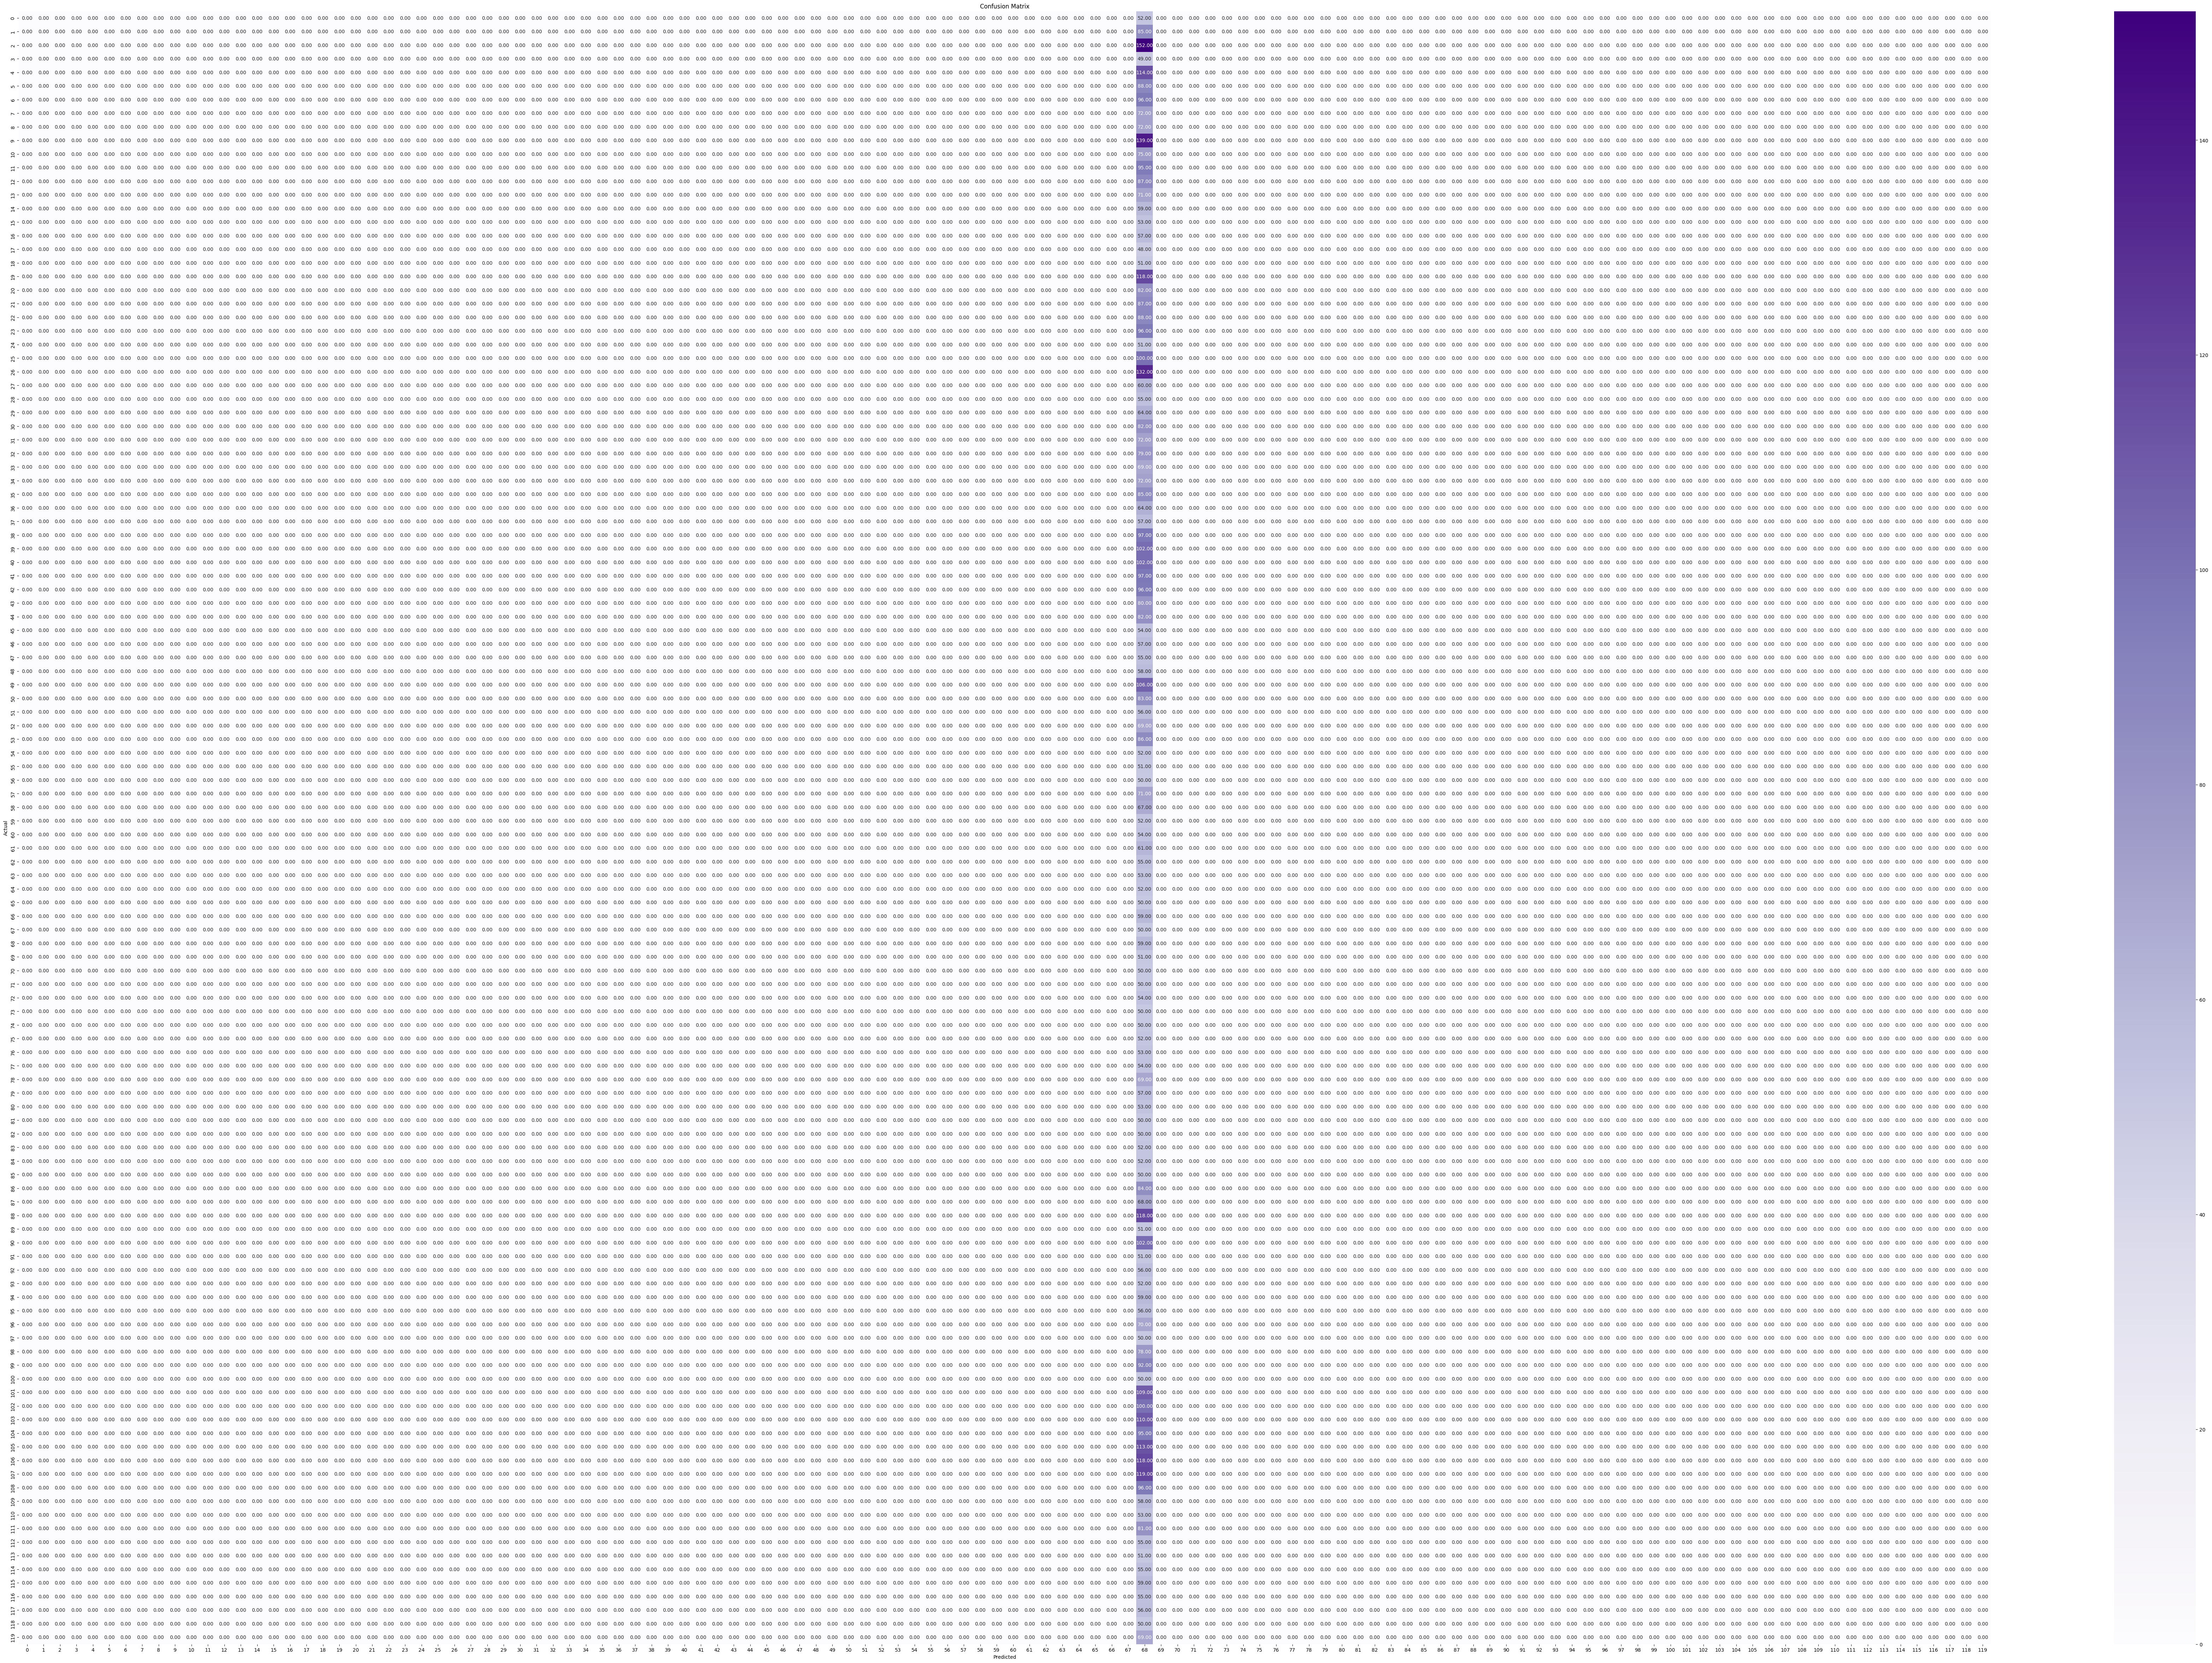

In [ ]:
# Plotting
plt.figure(figsize=(90, 60))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Purples')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The model perceived all dogs as breed 68, with almost no recognition of other breeds, demonstrating an extremely poor performance in dog breed identification.

#### <font color="#bba1cb">***Alexnet Hyperparamater Tuning***</font>

Try tuning the model to see if the accuracy can be improved.
1. Add batch normalization layers.
2. Change the dropout rate to 0.2.
3. Implement a learning rate of 0.001.
4. Add parameters to early stopping and checkpoint, focusing on accuracy.

In [39]:
# Build Alexnet model for tuning
# Add batch normalization layers, and change dropout rate to 0.2

alexnet_model_tuning = tf.keras.Sequential([
    tf.keras.layers.Conv2D(48, (3,3), padding='same', input_shape=(224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(192, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(192, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(120, activation='softmax')
])

In [40]:
# Adjust learning rate size.
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

optimizer_tuning = Adam(learning_rate=0.0001)
alexnet_model_tuning.compile(optimizer=optimizer_tuning, loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
alexnet_model_tuning.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_203 (Conv2D)         (None, 224, 224, 48)      1344      
                                                                 
 batch_normalization_194 (B  (None, 224, 224, 48)      192       
 atchNormalization)                                              
                                                                 
 activation_193 (Activation  (None, 224, 224, 48)      0         
 )                                                               
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 112, 112, 48)      0         
 ng2D)                                                           
                                                                 
 conv2d_204 (Conv2D)         (None, 112, 112, 128)     55424     
                                                      

In [42]:
# Early stopping focusing on accuracy
early_stopping_tuning = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=5,             # Reduce patience
    min_delta=0.01,         # Set a minimum change for improvement
    mode='max',             # Mode should be 'max' for accuracy
    verbose=1
)

# Model Checkpoint Callback focusing on accuracy
model_checkpoint_tuning = tf.keras.callbacks.ModelCheckpoint(
    'alexnet_best_model_tuning.h5',
    monitor='val_accuracy',   # Monitor validation accuracy
    save_best_only=True,
    mode='max',               # Mode should be 'max' for accuracy
    save_freq='epoch',        # Save the model at the end of every epoch
    verbose=1
)


# Fit the model
history_tuning = alexnet_model_tuning.fit(
    train_base, 
    epochs=10, 
    validation_data=val_base, 
    callbacks=[early_stopping_tuning, model_checkpoint_tuning]
)

Epoch 1/10
300/300 [==============================] - ETA: 0s - loss: 5.1668 - accuracy: 0.0078
Epoch 1: val_accuracy improved from -inf to 0.00500, saving model to alexnet_best_model_tuning.h5
300/300 [==============================] - 1261s 4s/step - loss: 5.1668 - accuracy: 0.0078 - val_loss: 4.7877 - val_accuracy: 0.0050
Epoch 2/10
300/300 [==============================] - ETA: 0s - loss: 4.7878 - accuracy: 0.0090
Epoch 2: val_accuracy did not improve from 0.00500
300/300 [==============================] - 1271s 4s/step - loss: 4.7878 - accuracy: 0.0090 - val_loss: 4.7879 - val_accuracy: 0.0050
Epoch 3/10
300/300 [==============================] - ETA: 0s - loss: 4.7582 - accuracy: 0.0132
Epoch 3: val_accuracy improved from 0.00500 to 0.01333, saving model to alexnet_best_model_tuning.h5
300/300 [==============================] - 1267s 4s/step - loss: 4.7582 - accuracy: 0.0132 - val_loss: 4.6974 - val_accuracy: 0.0133
Epoch 4/10
300/300 [==============================] - ETA: 0s -

In [44]:
test_loss, test_accuracy = alexnet_model_tuning.evaluate(test_base)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

269/269 [==============================] - 198s 733ms/step - loss: 4.6986 - accuracy: 0.0227
Test Accuracy: 2.27%


The accuracy has improved but remains low at 2.27%. This may be because handling 120 breeds of dogs is too complex for AlexNet. It might not be suitable for this dataset.

In [49]:
y_pred = alexnet_model_tuning.predict(test_base)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Extracting true labels from the test set
y_true = np.concatenate([y for x, y in test_base], axis=0)
y_true = np.argmax(y_true, axis=1)  # Convert one-hot encoded labels to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

cm

269/269 [==============================] - 245s 909ms/step


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

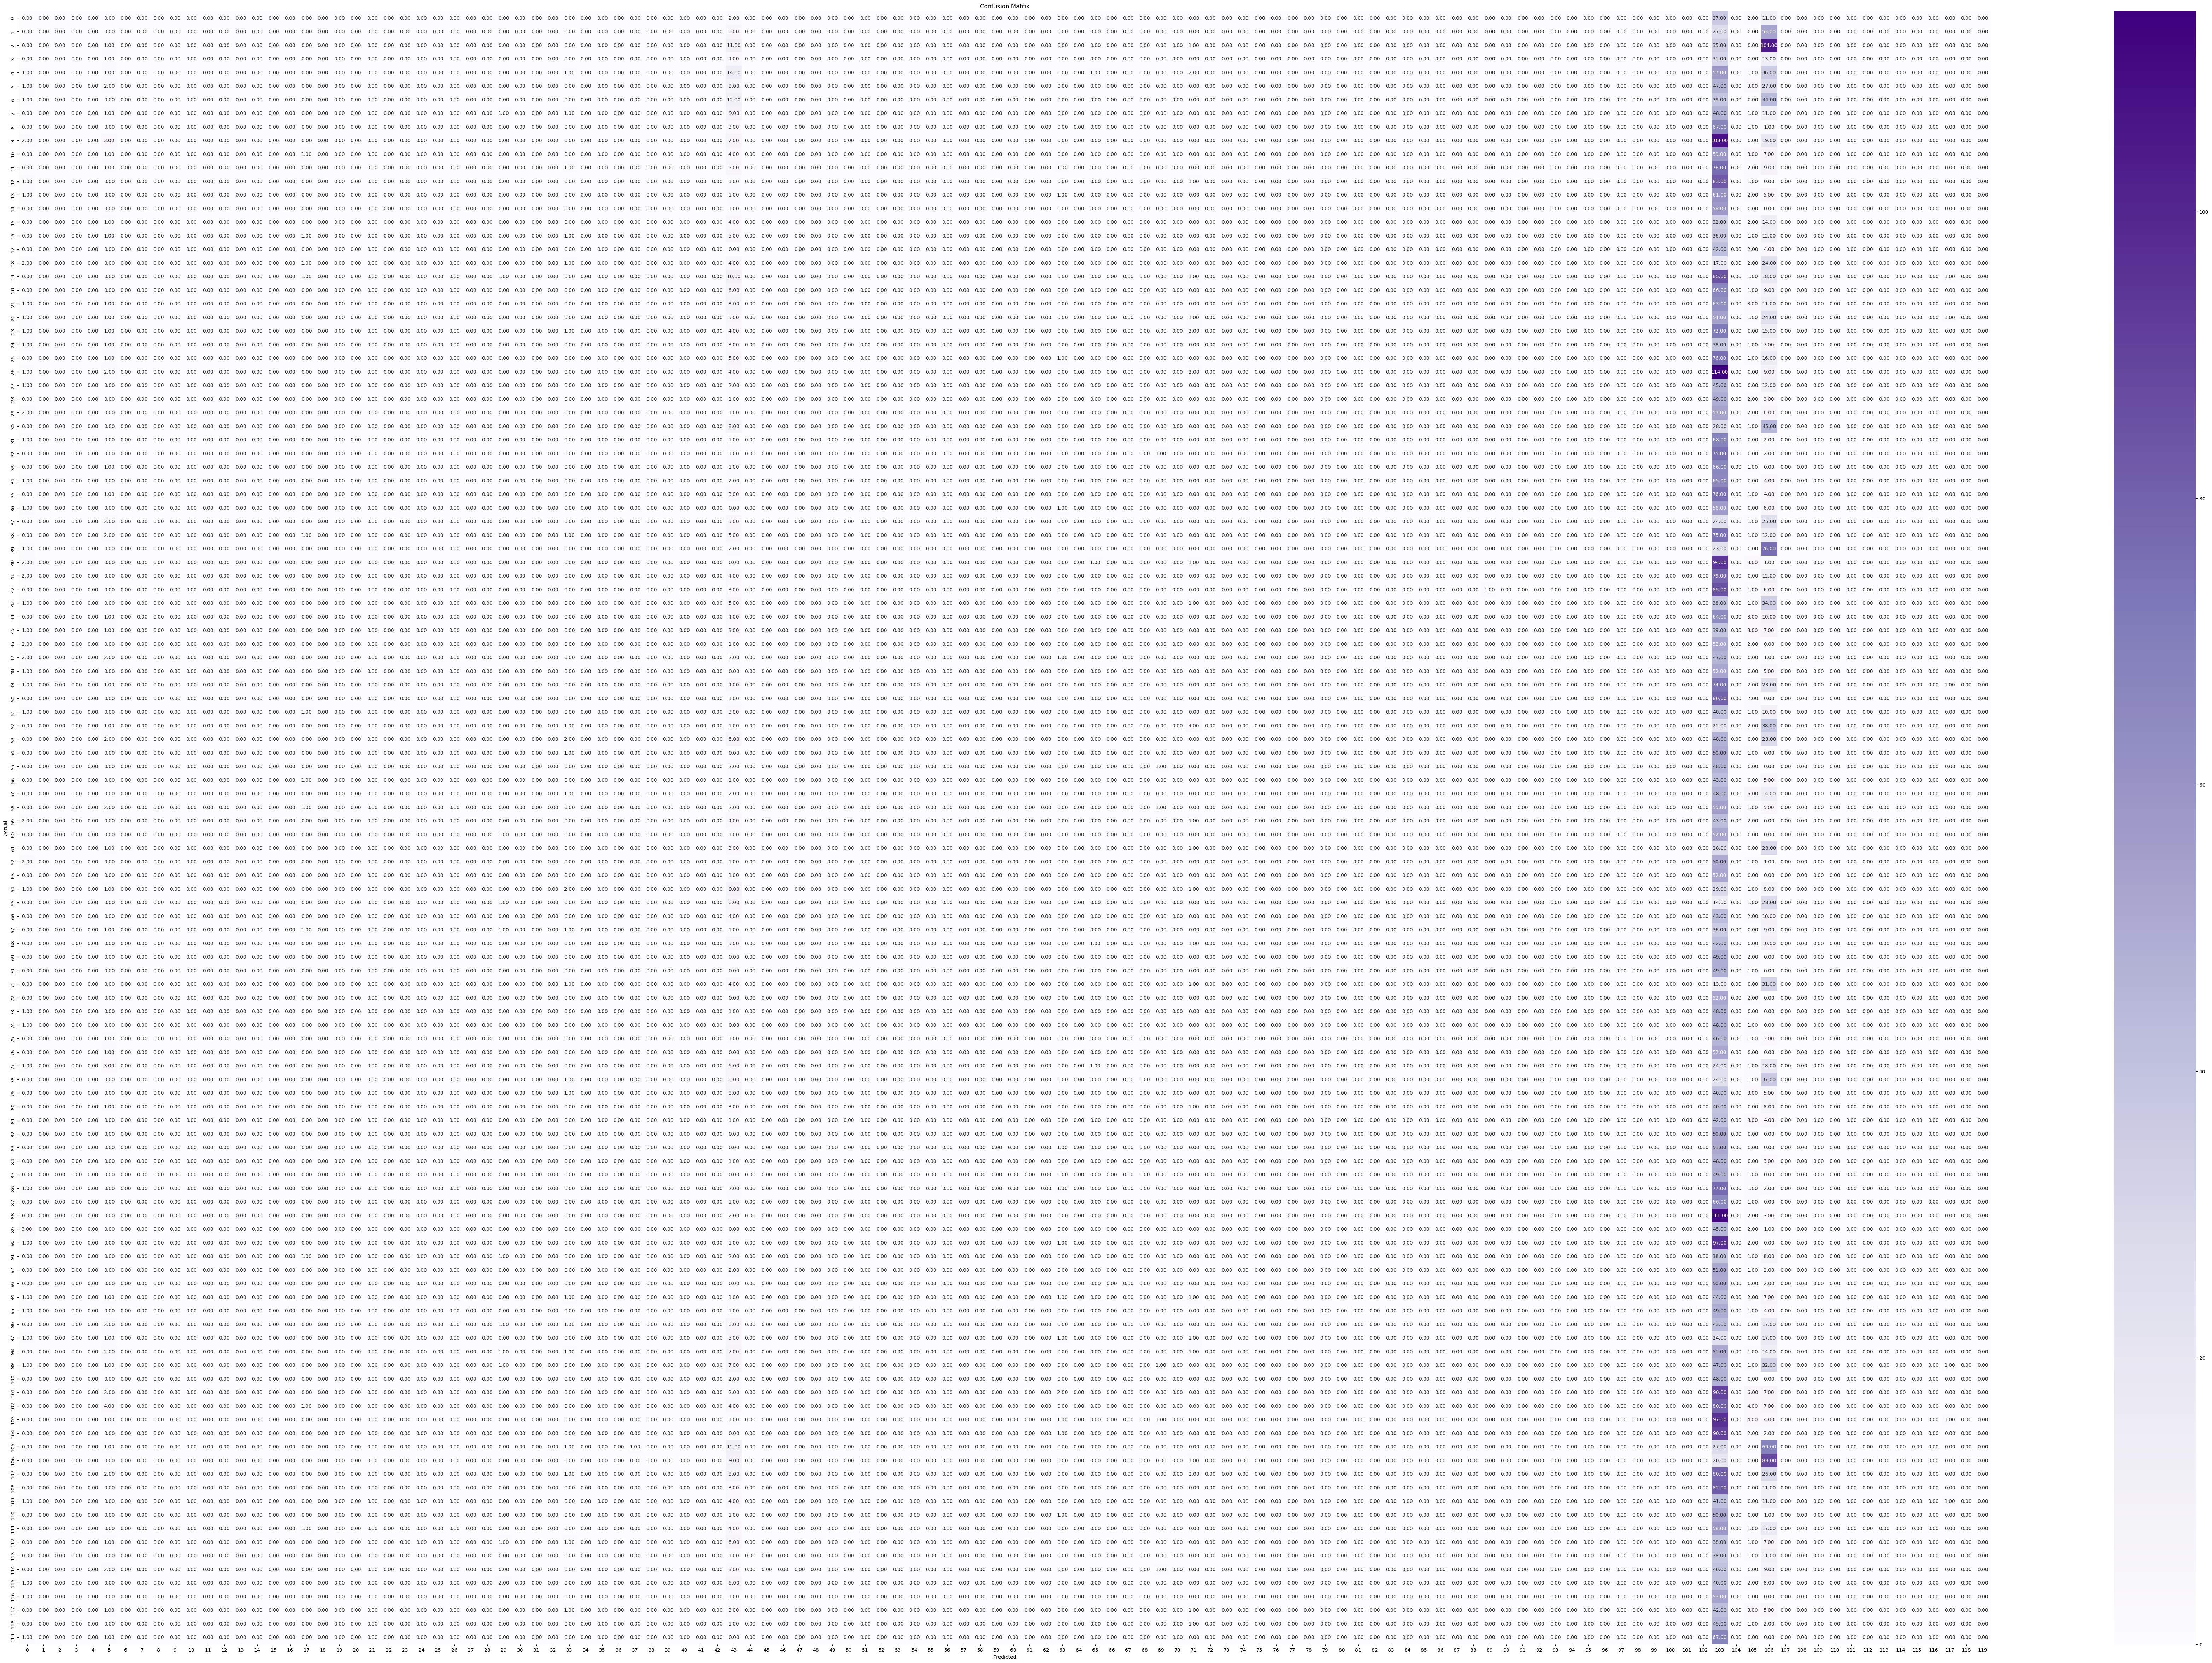

In [51]:
# Plotting
plt.figure(figsize=(90, 60))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Purples')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Now, the prediction model is biased towards breeds 103 and 106, still resulting in a high rate of false predictions.

#### <font color="#bba1cb">***Inception Model Test***</font>

Since inception model uses parallel convolutions of different sizes, it is good at complex image recognition tasks and can use resources efficiently. Try this model as a base model and build on it to see if the model can perform well. ***InceptionV3*** model will be used in this section.

In [23]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [24]:
def preprocess_inception(image, label):
    image = tf.image.resize(image, [224, 224])
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    label = tf.cast(label, tf.int32)
    label = tf.one_hot(label, depth=120)
    return image, label

train_icp = train_data.map(preprocess_inception).batch(32)
val_icp = val_data.map(preprocess_inception).batch(32)
test_icp = test_data.map(preprocess_inception).batch(32)

In [32]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the convolutional base

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(120, activation='softmax')  # 120 breeds
])

In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3),
    ModelCheckpoint(filepath='best_inception_model.h5', save_best_only=True)
]

history = model.fit(train_icp, epochs=10, validation_data=val_icp, callbacks=callbacks)

Epoch 1/10
300/300 [==============================] - ETA: 0s - loss: 1.2534 - accuracy: 0.6842

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


300/300 [==============================] - 284s 917ms/step - loss: 1.2534 - accuracy: 0.6842 - val_loss: 0.8474 - val_accuracy: 0.7613
Epoch 2/10
300/300 [==============================] - 289s 960ms/step - loss: 0.6506 - accuracy: 0.8074 - val_loss: 0.8184 - val_accuracy: 0.7729
Epoch 3/10
300/300 [==============================] - 259s 863ms/step - loss: 0.5179 - accuracy: 0.8373 - val_loss: 0.8222 - val_accuracy: 0.7783
Epoch 4/10
300/300 [==============================] - 256s 850ms/step - loss: 0.4320 - accuracy: 0.8580 - val_loss: 0.8733 - val_accuracy: 0.7742
Epoch 5/10
300/300 [==============================] - 259s 860ms/step - loss: 0.3634 - accuracy: 0.8773 - val_loss: 0.9070 - val_accuracy: 0.7804


Since the patience parameter is set to 3, the training stops at 5 with an increase in the validation loss in the third consecutive epoch. This avoids overfitting and saves computational costs and time.

In [45]:
test_loss, test_accuracy = model.evaluate(test_icp)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

269/269 [==============================] - 151s 562ms/step - loss: 0.8462 - accuracy: 0.7894
Test Accuracy: 78.94%


The test accuracy has reached a notable 78.94%, indicating that the model can correctly identify dog breeds with a 78.94% probability. This level of performance is impressive and represents a significant improvement over the results achieved with AlexNet.

In [47]:
y_pred = model.predict(test_icp)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Extracting true labels from the test set
y_true = np.concatenate([y for x, y in test_icp], axis=0)
y_true = np.argmax(y_true, axis=1)  # Convert one-hot encoded labels to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

cm

269/269 [==============================] - 181s 671ms/step


array([[ 37,   0,   0, ...,   1,   0,   0],
       [  0,  72,   0, ...,   0,   0,   0],
       [  0,   0, 125, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  50,   0,   0],
       [  0,   0,   0, ...,   6,  42,   0],
       [  0,   0,   0, ...,   1,   0,  67]])

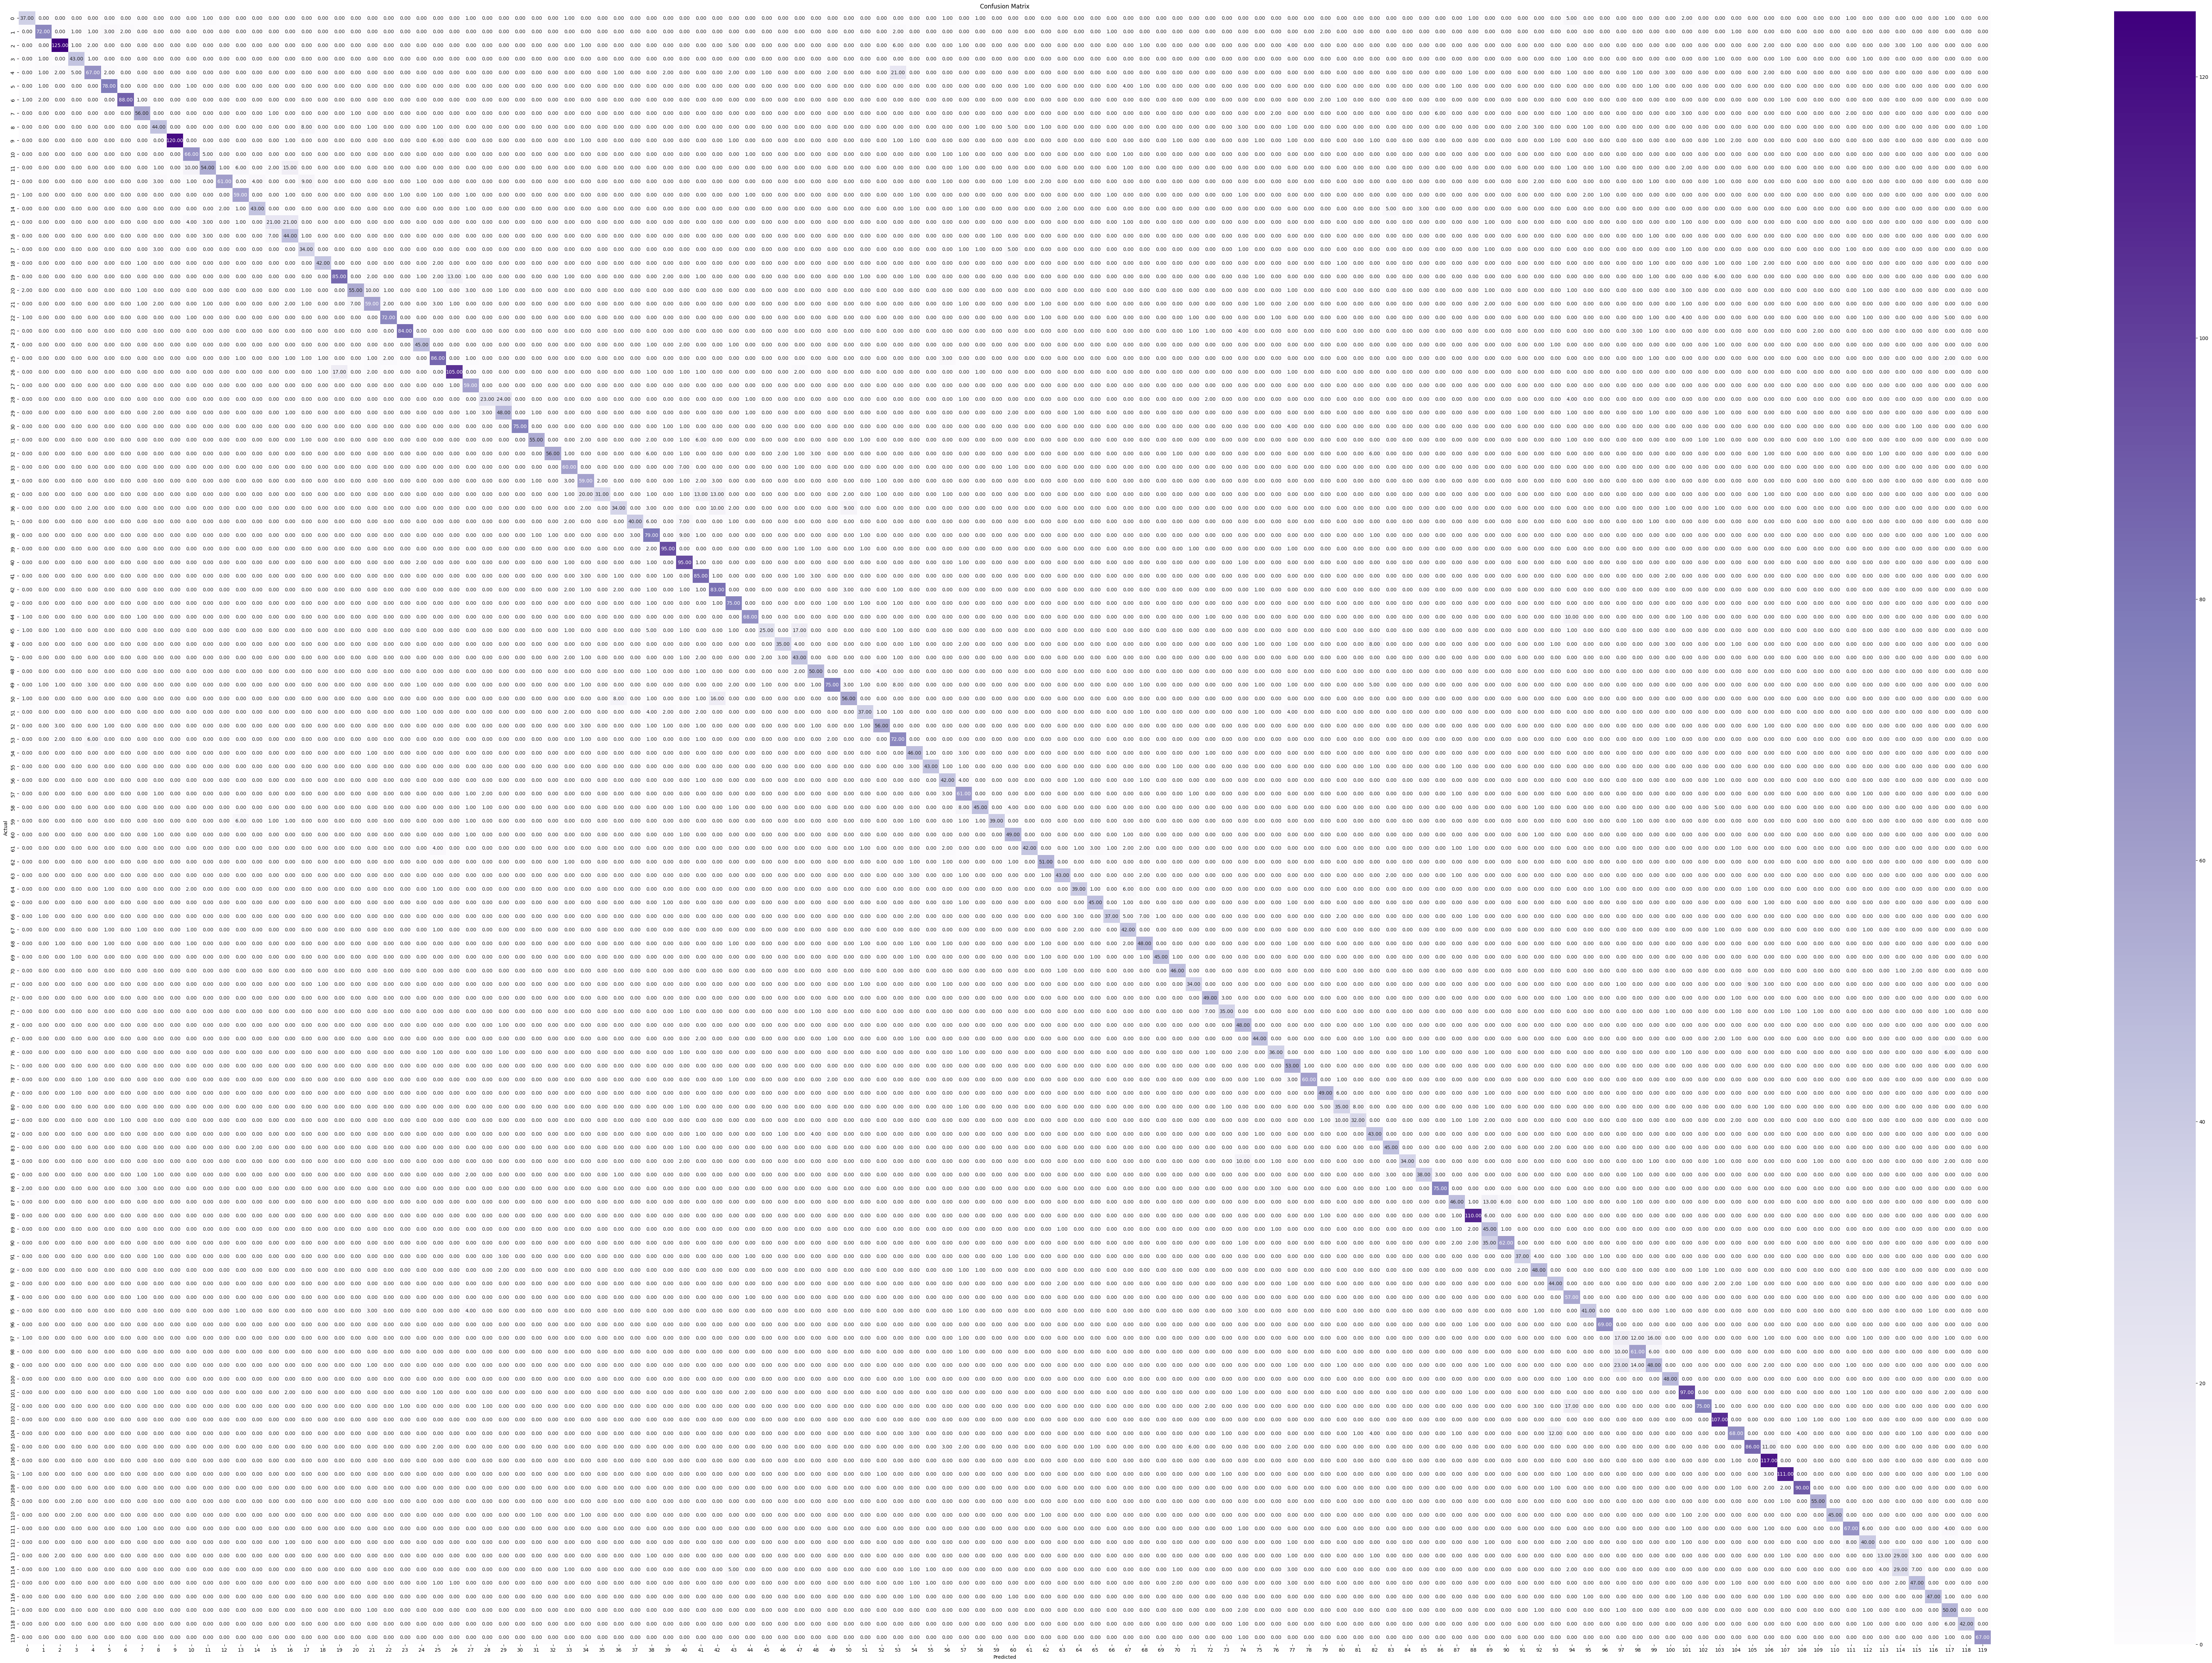

In [48]:
# Plotting
plt.figure(figsize=(90, 60))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Purples')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The confusion matrix further validates the model's strong performance, as evidenced by the prominent diagonal purple line in the graph. This line indicates that the model has achieved a high degree of accuracy in its predictions, correctly identifying most instances.

In [53]:
alexnet_base_results = alexnet_model.evaluate(test_base)
alexnet_tuning_results = alexnet_model_tuning.evaluate(test_base)
inception_results = model.evaluate(test_icp)

269/269 [==============================] - 194s 721ms/step - loss: 0.8462 - accuracy: 0.7894


In [58]:
# Creating a DataFrame with the accuracy results
import pandas as pd
accuracy_results = {
    "Model": ["AlexNet", "AlexNet Tuned", "Inception"],
    "Loss": [alexnet_base_results[0], alexnet_tuning_results[0], inception_results[0]],
    "Accuracy": [alexnet_base_results[1], alexnet_tuning_results[1], inception_results[1]]
}

accuracy_results_df = pd.DataFrame(accuracy_results)
accuracy_results_df

,Model,Loss,Accuracy
0,AlexNet,4.788447,0.006876
1,AlexNet Tuned,4.698551,0.022727
2,Inception,0.846230,0.789394


The Inception model is evidently the best performer among the three, with high accuracy and low loss, indicating effective learning and generalization. In contrast, both versions of AlexNet, particularly the one before tuning, struggle significantly with this task, as their high loss and very low accuracy demonstrate a lack of ability in identifying dog breeds.

#### <font color="#bba1cb">***Conclusion***</font>

The Stanford Dogs Dataset includes over 20,000 pictures and 120 breeds. This makes it a large dataset compared to other dog datasets like CUB-200, PPMI, and PASCAL, as mentioned on the dataset information website. Such large amount presents significant challenges for models in terms of processing time and performance. 

When leveraging and comparing two different models, 'AlexNet' and 'InceptionV3', it is evident that InceptionV3 has a much stronger capability in identifying dog breeds within the Stanford Dogs Dataset. This may be because of the following reasons:

1. InceptionV3's architecture is much deeper than that of AlexNet, enabling it to learn more complex and abstract features. 
2. The model utilizes Inception modules, which are mini-networks performing various convolutions in parallel. This design allows it to capture features at different scales and complexities, which is essential for recognizing a diverse range of dog breeds. 
3. It efficiently uses 1x1 convolution layers, maintaining feature information while reducing computational load, thereby enhancing efficiency for large datasets.
4. It employs global average pooling instead of fully connected layers, reducing the total number of parameters and helping to mitigate overfitting.

AlexNet, with its simpler architecture, demonstrates limitations in handling the dataset's complexity and variety. This is evident in its longer processing time, lower test accuracy, and poorly performing confusion matrix results.